Построим модель машинного обучения для предсказания целевой переменной на примере датасета ирисы Фишера.

Этот датасет про цветы. В нем собраны измерения разных частей ирисов:

sepal length (cm) - длина чашелистика (в сантиметрах)

sepal width (cm) - ширина чашелистика (в сантиметрах)

petal length (cm) - длина лепестка (в сантиметрах)

petal width (cm) - ширина лепестка (в сантиметрах)

Кроме того, в датасете есть информация о виде ириса (сорт), к которому относятся измерения.

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.model_selection import learning_curve

In [11]:
from sklearn.datasets import load_iris
df = load_iris(as_frame=True)['frame']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [15]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


In [17]:
# Сорта ириса хранит переменная target	(является категориальной)
# Iris-setosa
# Iris-versicolor
# Iris-virginica

df['target'].value_counts()

,count
target,
0,50
1,50
2,50


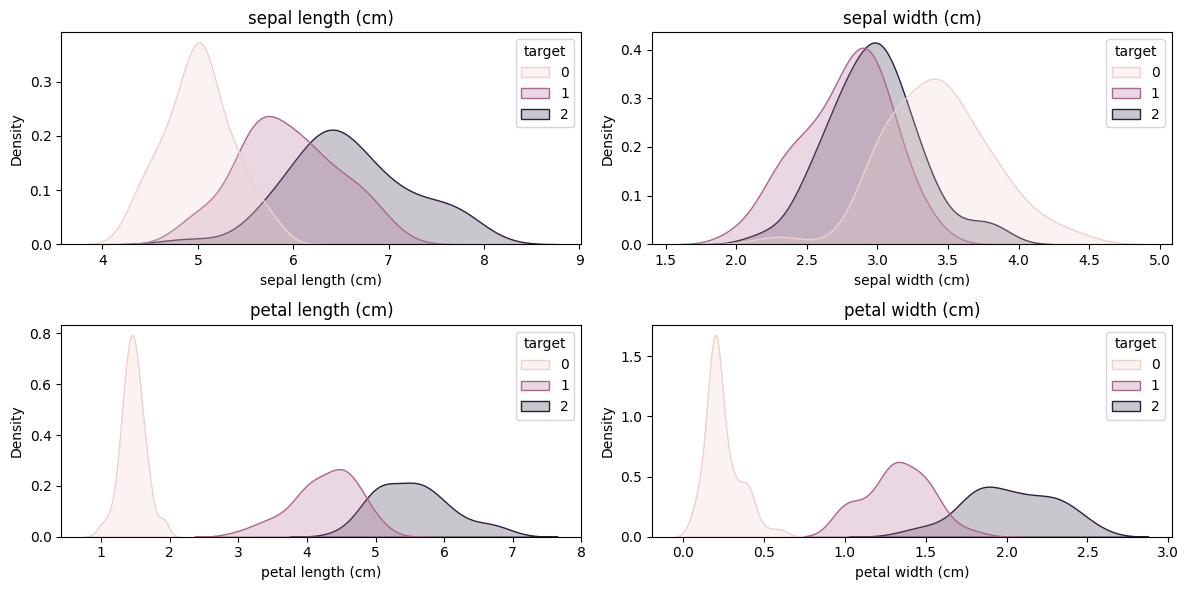

In [23]:
# Визуализируем распределение непрерывных данных

# Исключаем столбец 'target' из списка числовых признаков
numerical_features = [ col for col in df.columns if df[col].dtype in ['int64','float64'] and col != 'target']

# Используем сетку 2x2 для 4 числовых признаков
fig, axes = plt.subplots(2,2,figsize=(12,6))
axes = axes.flatten()
for i,col in enumerate(numerical_features):
    sns.kdeplot(data=df,x=col, hue=df['target'], fill=True, ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

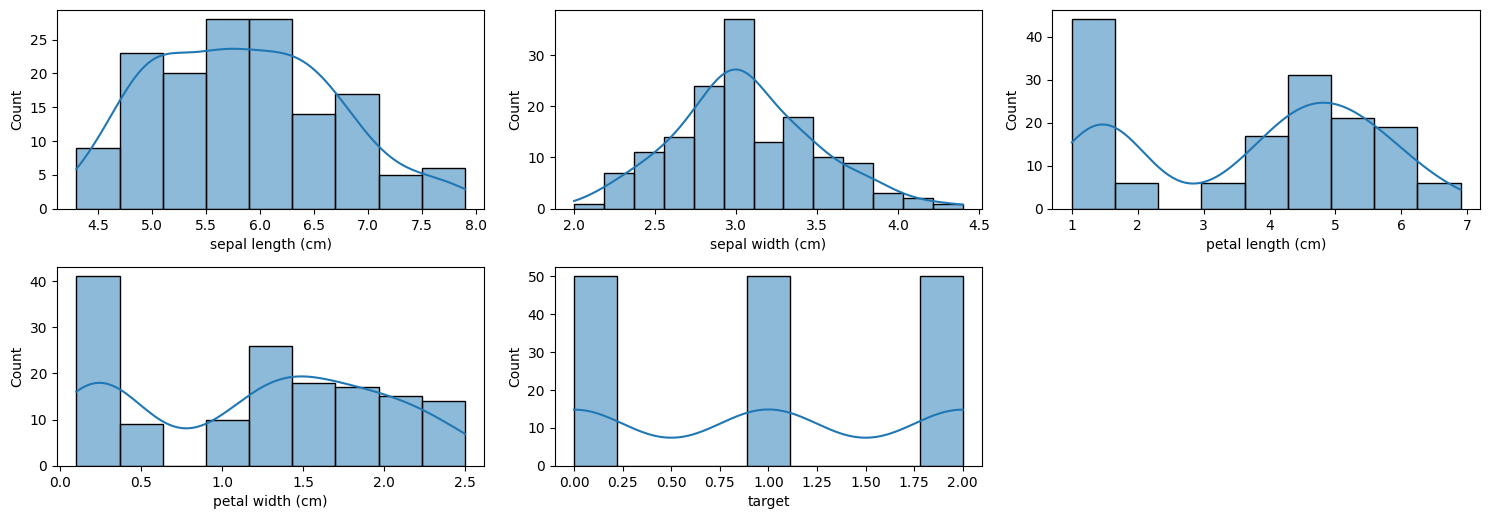

In [24]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[column], kde=True)

plt.tight_layout()
plt.show()

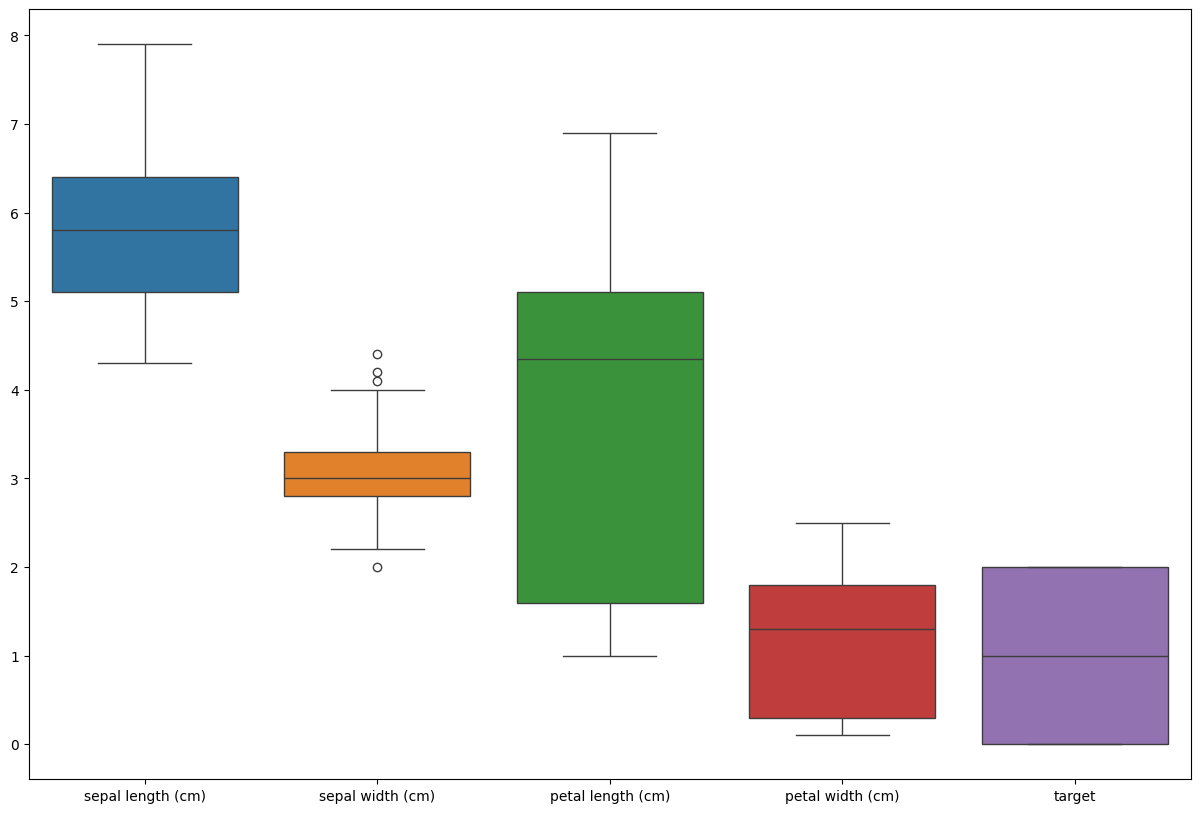

In [25]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data= df, ax=ax)
plt.show()

Выброс возможно есть у переменной sepal width (ширина чашелистика)

In [26]:
# Делим на тренировочный и тестовый набор данных
X = df.drop('target', axis=1)
Y = df['target']
X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, train_size=0.8, random_state = 42)

In [27]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [28]:
# Обучим модель логистической регрессии без регуляризации
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
Y_pred_train_lin = lin_reg.predict(X_train)
Y_pred_test_lin = lin_reg.predict(X_test)

In [29]:
poly_features = PolynomialFeatures(degree=5)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
Y_pred_train_poly = poly_reg.predict(X_train_poly)
Y_pred_test_poly = poly_reg.predict(X_test_poly)

In [30]:
# Вывод результатов
print("Линейная регрессия:")
print("Тренировочный R^2:", r2_score(y_train, Y_pred_train_lin))
print("Тестовый R^2:", r2_score(y_test, Y_pred_test_lin))
print("\nПолиномиальная регрессия:")
print("Тренировочный R^2:", r2_score(y_train, Y_pred_train_poly))
print("Тестовый R^2:", r2_score(y_test, Y_pred_test_poly))

Линейная регрессия:
Тренировочный R^2: 0.9254199044989622
Тестовый R^2: 0.9468960016420045

Полиномиальная регрессия:
Тренировочный R^2: 1.0
Тестовый R^2: -205.3847181537102


На основе представленных результатов коэффициентов детерминации для тренировочных и тестовых наборов данных можно сделать следующие выводы:

Линейная регрессия:

Тренировочный R^2: 0.9254 - модель хорошо объясняет 92.54% изменчивости данных на тренировочном наборе.
Тестовый R^2: 0.9469 - модель показывает хорошую способность обобщать на новые данные, объясняя 94.69% изменчивости данных на тестовом наборе.

Разница между R^2 на тренировочном и тестовом наборах небольшая, что показывает, что модель не переобучилась и не недообучилась, производительность сбалансированная. Модель хорошо и адекватно отражает и улавливает основные тенденции в данных.

Если бы модель сильно переобучилась, R^2 на тестовом наборе был бы значительно ниже, чем на тренировочном.
Немного более высокий R^2 на тестовом наборе может указывать на то, что модель могла бы лучше уловить некоторые нюансы данных, если бы была более сложной.


Полиномиальная регрессия:

Тренировочный R^2: 1.0 - модель идеально подходит к тренировочным данным, объясняя 100% их изменчивости.
Тестовый R^2: -205.38 - результат сильно отрицательный, что означает модель сильно переобучилась. Она идеально запомнила тренировочные данные, но не смогла обобщить на новые данные.

Линейная регрессия демонстрирует лучшее обобщение на тестовых данных, чем полиномиальная. Полиномиальная регрессия, несмотря на идеальный результат на тренировочном наборе, не подходит для моделирования данных из-за чрезмерной переобученности.

In [31]:
# Однократная оценка на тестовых данных
single_score = r2_score(Y_pred_test_poly, poly_reg.predict(X_test_poly))
print("Однократная оценка эффективности (R^2):", single_score)

# 5-кратная кросс-валидация на всем датасете
cross_val_scores = cross_val_score(poly_reg, X, Y, cv=5, scoring='r2')
print("Среднее значение R^2 по 5-кратной кросс-валидации:", cross_val_scores.mean())

scores_10 = cross_val_score(poly_reg, X, Y, cv=10, scoring='r2')
print("Среднее значение R^2 при 10-кратной кросс-валидации:", scores_10.mean())

Однократная оценка эффективности (R^2): 1.0
Среднее значение R^2 по 5-кратной кросс-валидации: 0.3225607248900085
Среднее значение R^2 при 10-кратной кросс-валидации: 0.15982002432211515


Однократная оценка эффективности (R^2): 1.0 - означает, что модель идеально подошла к тренировочным данным. Она запомнила все нюансы и особенности, но не смогла обобщить знания на новые данные.

Среднее значение R^2 по 5-кратной кросс-валидации: 0.3225 - результат уже значительно ниже, чем однократная оценка. Модель не может хорошо предсказывать новые данные, даже когда мы делим данные на пять частей и обучаем модель на четырех частях, а тестируем на оставшейся.

Среднее значение R^2 при 10-кратной кросс-валидации: 0.1598 - показатель еще ниже, чем при 5-кратной кросс-валидации. Еще одно подтверждение, что модель сильно переобучилась.

In [33]:
# Применим методы регуляризации (L1, L2) к своей модели, чтобы ограничить ее сложность и предотвратить переобучение

# Параметры регуляризации для тестирования
alphas = [0.01, 0.1, 1.0, 10.0, 100.0]

# Тестируем Lasso регрессию
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    print(f'Lasso alpha {alpha}: R^2 score: {r2_score(y_test, y_pred)}')

# Тестируем Ridge регрессию
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    print(f'Ridge alpha {alpha}: R^2 score: {r2_score(y_test, y_pred)}')

Lasso alpha 0.01: R^2 score: 0.9465519851231513
Lasso alpha 0.1: R^2 score: 0.9348982743390388
Lasso alpha 1.0: R^2 score: -0.0024841017488073103
Lasso alpha 10.0: R^2 score: -0.0024841017488073103
Lasso alpha 100.0: R^2 score: -0.0024841017488073103
Ridge alpha 0.01: R^2 score: 0.9468989562948567
Ridge alpha 0.1: R^2 score: 0.9469191617906771
Ridge alpha 1.0: R^2 score: 0.9467123506063373
Ridge alpha 10.0: R^2 score: 0.9389199467266506
Ridge alpha 100.0: R^2 score: 0.8717788347792483


Лучшие результаты модели Lasso наблюдаются при alpha 0.01 (R^2=0.9465) и alpha 0.1 (R^2=0.9348), что указывает на достаточно хорошую адекватность модели к данным. С увеличением alpha (0.1 - 100.0) R^2 значительно падает, что говорит о слишком сильной регуляризации, в результате которой модель становится неспособной адекватно предсказывать результаты.

Для модели Ridge значение R^2 увеличивается медленно и стабильно с увеличением параметра альфа, достигая наилучшего результата при alpha 0.01 (R^2=0.9468), 0.1 (R^2=0.9469) и 1.0 (R^2=0.9467).
С увеличением alpha (10.0 и 100.0) R^2 постепенно снижается, но не так резко, как у Lasso. Это показывает, что Ridge более устойчив к изменениям альфа и менее склонен к потере эффективности из-за чрезмерной регуляризации, по сравнению с Lasso.

Таким образом, можно заключить, что модель Lasso более чувствительна к выбору параметра альфа, особенно в условиях, когда альфа становится достаточно велико.
Как вариант - проверить Lasso с alpha 0.01 и 0.1 в качестве альтернативы.

Модель Ridge показывает более стабильную производительность при изменении альфа и может быть лучшим выбором, если есть сомнения относительно оптимального значения альфа. Использовать Ridge регрессию с alpha 0.01, 0.1 или 1.0.


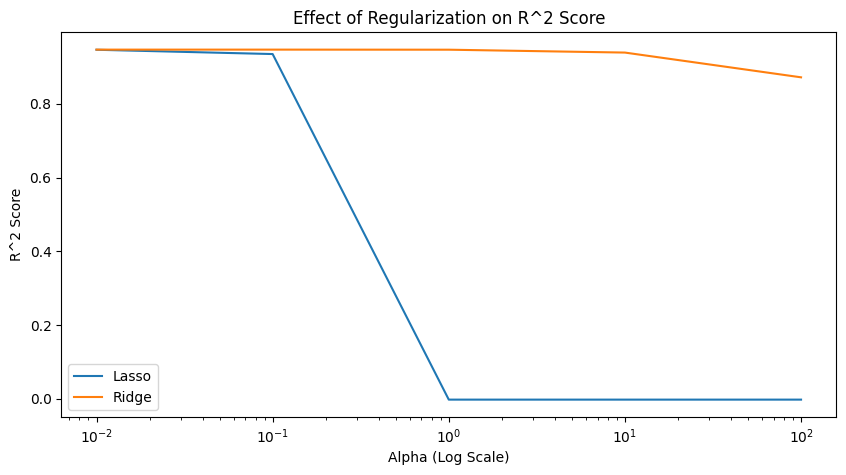

In [34]:
# Переопределим данные для создания графиков
r2_scores_lasso = []
r2_scores_ridge = []

# Тестируем Lasso регрессию и Ridge регрессию, сохраняем результаты R^2
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    r2_scores_lasso.append(r2_score(y_test, y_pred_lasso))

    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    r2_scores_ridge.append(r2_score(y_test, y_pred_ridge))

# Создаем графики
plt.figure(figsize=(10, 5))
plt.plot(alphas, r2_scores_lasso, label='Lasso')
plt.plot(alphas, r2_scores_ridge, label='Ridge')
plt.xscale('log')
plt.xlabel('Alpha (Log Scale)')
plt.ylabel('R^2 Score')
plt.title('Effect of Regularization on R^2 Score')
plt.legend()
plt.show()


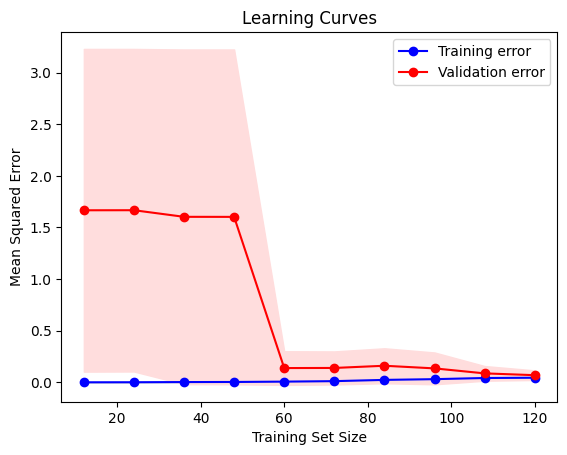

In [36]:
# Построим графики кривых обучения для каждой из моделей.
from sklearn.model_selection import learning_curve
# Создание модели линейной регрессии
model = LinearRegression()

# Получение кривых обучения
train_sizes, train_scores, validation_scores = learning_curve(
    estimator=model,
    X=X,
    y=Y,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring='neg_mean_squared_error'
)

# Средние значения и стандартное отклонение ошибок обучения
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Средние значения и стандартное отклонение ошибок валидации
validation_mean = -np.mean(validation_scores, axis=1)
validation_std = np.std(validation_scores, axis=1)

# Построение графиков
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='#DDDDDD')
plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, color='#FFDDDD')
plt.plot(train_sizes, train_mean, 'o-', color='b', label='Training error')
plt.plot(train_sizes, validation_mean, 'o-', color='r', label='Validation error')

plt.title('Learning Curves')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

Резюме и обоснование выбора параметров
Lasso (L1-регуляризация):

При малых значениях alpha (0.01, 0.1) Lasso показывает результаты, близкие к линейной регрессии, и немного лучше справляется с переобучением.
При больших значениях alpha (1.0, 10.0, 100.0) Lasso сильно упрощает модель, что приводит к резкому снижению точности.
Выбор параметра alpha для Lasso:

Рекомендуется использовать малые значения alpha (0.01 - 0.1). Это позволит сохранить точность модели, не допуская чрезмерного упрощения и переобучения.
Ridge (L2-регуляризация):

При разных значениях alpha Ridge показывает стабильные результаты на тестовых данных, близкие к результатам линейной регрессии.
Выбор параметра alpha для Ridge:

Рекомендуется использовать кросс-валидацию для подбора оптимального значения alpha. Это позволит найти компромисс между точностью и устойчивостью модели.
Выводы о качестве моделирования:

Линейная регрессия показывает хорошие результаты как на тренировочных, так и на тестовых данных.
Lasso может быть полезен для предотвращения переобучения при достаточно простых данных. Однако, при слишком больших значениях alpha может сильно упростить модель.
Ridge демонстрирует устойчивость и хорошую точность, что делает его отличным выбором для регуляризации линейных моделей.

Анализ кривых обучения, отображающих ошибки на обучающей и валидационной выборках в зависимости от размера обучающей выборки, показывает следующее:
при размере обучающей выборки около100 наблюдений, ошибки на обучающей и валидационной выборках становятся стабильными и равными.
Ошибка на обучающей выборке (Training error) и ошибка на валидационной выборке (Validation error) стабилизируются и сближаются, что указывает на уменьшение переобучения и хорошую обобщающую способность модели.